# Lesson1: Geometric Objects - Spatial Data Model

- https://kodu.ut.ee/~kmoch/geopython2019/L1/Geometric-Objects.html

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

In [2]:
# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)

point2 = Point(7.2, -25.1)

point3 = Point(9.26, -2.456)

point3D = Point(9.26, -2.456, 0.57)

# What is the type of the point?
point_type = type(point1)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)
<class 'shapely.geometry.point.Point'>


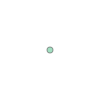

In [3]:
print(point1)

print(point3D)

print(type(point1))

display(point1)

In [4]:
# Get the coordinates
point_coords = point1.coords

# What is the type of this?
type(point_coords)

shapely.coords.CoordinateSequence

In [5]:
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

In [6]:
print(xy)

print(x)

print(y)

(array('d', [2.2]), array('d', [4.2]))
2.2
4.2


In [7]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


In [8]:
# law of cosines - determines the great-circle distance between two points on a 
# sphere given their longitudes and latitudes based on "basic math"
import math

distance = math.acos(math.sin(math.radians(point1.y))*math.sin(math.radians(point2.y))+
                     math.cos(math.radians(point1.y))*math.cos(math.radians(point2.y))*
                     math.cos(math.radians(point2.x)-math.radians(point1.x)))*6378

print( "{0:8.4f} for equatorial radius in km".format(distance))

distance = math.acos(math.sin(math.radians(point1.y))*math.sin(math.radians(point2.y))+
                     math.cos(math.radians(point1.y))*math.cos(math.radians(point2.y))*
                     math.cos(math.radians(point2.x)-math.radians(point1.x)))*6356

print( "{0:8.4f} for polar radius in km".format(distance))


3306.1044 for equatorial radius in km
3294.7004 for polar radius in km


In [9]:
# with pyproj
import pyproj

geod = pyproj.Geod(ellps='WGS84')

angle1,angle2,distance = geod.inv(point1.x, point1.y, point2.x, point2.y)

print ("{0:8.4f} for ellipsoid WGS84 in km".format(distance/1000))

3286.3538 for ellipsoid WGS84 in km


In [10]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


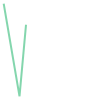

In [11]:
print(line)
print(line2)
type(line)
display(line)

In [12]:
# Get x and y coordinates of the line
lxy = line.xy

print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


In [13]:
# Extract x coordinates
line_x = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_y = line.xy[1]

print(line_x)

print(line_y)

array('d', [2.2, 7.2, 9.26])
array('d', [4.2, -25.1, -2.456])


In [14]:
# Get the lenght of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid

# What type is the centroid?
centroid_type = type(l_centroid)

# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", centroid_type)

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
Geometry type as text: Polygon
Geometry how Python shows it: <class 'shapely.geometry.polygon.Polygon'>


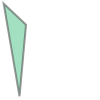

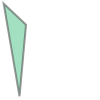

In [15]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

# Geometry type can be accessed as a String
poly_type = poly.geom_type

# Using the Python's type function gives the type in a different format
poly_type2 = type(poly)

# Let's see how our Polygon looks like
print(poly)
print(poly2)
print("Geometry type as text:", poly_type)
print("Geometry how Python shows it:", poly_type2)

display(poly)
display(poly2)

In [16]:
# Let's create a bounding box of the world and make a whole in it

# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


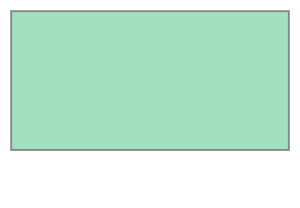

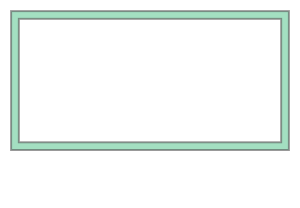

In [17]:
print(world)
print(world_has_a_hole)
type(world_has_a_hole)

display(world)
display(world_has_a_hole)

In [18]:
# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

In [19]:
print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Exterior: ", world_ext)
print("Poly Exterior Length: ", world_ext_length)

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


In [20]:
import pandas as pd

# make sure you have the correct path to your working file
# e.g. 'L1/global-city-population-estimates.csv' if you saved the file in your working directory

df = pd.read_csv('global-city-population-estimates.csv', sep=';', encoding='latin1')

# this option tells pandas to print up to 20 columns, typically a the print function will cut the output for better visibility
# (depending on the size and dimension of the dataframe)
pd.set_option('max_columns',20)

# print(df.head(5))
display(df.head(5))

,Country or area,Urban Agglomeration,Latitude,Longitude,Population_2015,Unnamed: 5
0,Japan,Tokyo,35.689500,139.691710,38001018,NaN
1,India,Delhi,28.666670,77.216670,25703168,NaN
2,China,Shanghai,31.220000,121.460000,23740778,NaN
3,Brazil,S?o Paulo,-23.550000,-46.640000,21066245,NaN
4,India,Mumbai (Bombay),19.073975,72.880838,21042538,NaN


In [21]:
# we make a function, that takes a row object coming from Pandas. The single fields per row are addressed by their column name.
def make_point(row):
    return Point(row['Longitude'], row['Latitude'])



In [22]:
# Go through every row, and make a point out of its lat and lon, by **apply**ing the function from above (downwards row by row -> axis=1)
df['points'] = df.apply(make_point, axis=1)

display(df.head(5))

,Country or area,Urban Agglomeration,Latitude,Longitude,Population_2015,Unnamed: 5,points
0,Japan,Tokyo,35.689500,139.691710,38001018,NaN,POINT (139.69171 35.6895)
1,India,Delhi,28.666670,77.216670,25703168,NaN,POINT (77.21666999999999 28.66667)
2,China,Shanghai,31.220000,121.460000,23740778,NaN,POINT (121.46 31.22)
3,Brazil,S?o Paulo,-23.550000,-46.640000,21066245,NaN,POINT (-46.64 -23.55)
4,India,Mumbai (Bombay),19.073975,72.880838,21042538,NaN,POINT (72.880838 19.073975)


In [23]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])



MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


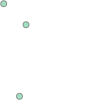

MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


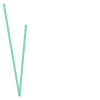

In [24]:
print("MultiPoint:", multi_point)
display(multi_point)

print("MultiLine: ", multi_line)
display(multi_line)

In [25]:
# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# --------------------------------------------------------------------------------------------------

# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s). 
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))


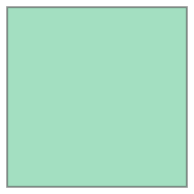

MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


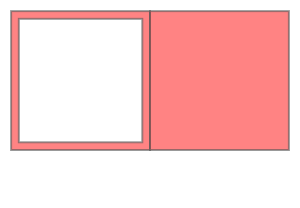

In [26]:
print("Bounding box: ", east_poly_box)
display(east_poly_box)

print("MultiPoly: ", multi_poly)
display(multi_poly)

In [27]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
convex = multi_point.convex_hull

# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)

# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area

# We can also access different items inside our geometry collections. We can e.g. access a single polygon from
# our MultiPolygon -object by referring to the index

# Let's calculate the area of our Western hemisphere (with a hole) which is at index 0
west_area = multi_poly[0].area

# We can check if we have a "valid" MultiPolygon. MultiPolygon is thought as valid if the individual polygons 
# does notintersect with each other. Here, because the polygons have a common 0-meridian, we should NOT have 
# a valid polygon. This can be really useful information when trying to find topological errors from your data
valid = multi_poly.is_valid

In [28]:
print("Convex hull of the points: ", convex)
print("Number of lines in MultiLineString:", lines_count)
print("Area of our MultiPolygon:", multi_poly_area)
print("Area of our Western Hemisphere polygon:", west_area)
print("Is polygon valid?: ", valid)

Convex hull of the points:  POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))
Number of lines in MultiLineString: 2
Area of our MultiPolygon: 39200.0
Area of our Western Hemisphere polygon: 6800.0
Is polygon valid?:  False
